# CURSO: Math & Stat

<img src="img/profile_manoelgadi.png" width=100 height=100 align="right">

Author: Prof. Manoel Gadi

Contact: mfalonso@faculty.ie.edu

LinkedIn: https://es.linkedin.com/in/manoel-gadi-97821213

Last revision: 29/Nov/2022

---


# In-depth introduction to the P-value 
## goodness of fit - F-statistic for Linear Regression uniform distribution


For this simulation we will:
1. __Create a dataset__ with 5 variables and 100 data points generated randomly.
All 5 independent variables will be scaled from 0 to 1 (variate). The dependent variable will also be scaled from 0 to 1.
2. Next, we __fit a Linear Regression__ and measure the sum of squared errors.
3. We will __repeat this a 1000 times__ and plot a histogram.
4. Next, we will __load the hbat data, fit a Linear Regression__ using the same number of variables and rows (in statistical terms it means the same degrees of freedom) and calculate the sum of squared errors (SSE).
5. Finally, __the p-value is the percentage of the random generated SSE (df_simulation) that are smaller than the one obtained by the hbat Linear Regression__. In this case you will see that it is 0%. Meaning that our model is better than 100% of the prediction made by a model generated in random sample with the same degree of freedom (variables and number of data points)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_simulation = pd.DataFrame()
df_simulation['squared_error'] = []
df_simulation

,squared_error


### 1. Create a dataset with 5 variables and 100 data points generated randomly.


* All 5 independent variables will be scaled from 0 to 1 (variate). The dependent variable will also be scaled from 0 to 1.


In [3]:
df = pd.DataFrame()

In [4]:
df['x1'] = np.random.random(100)
df['x2'] = np.random.random(100)
df['x3'] = np.random.random(100)
df['x4'] = np.random.random(100)
df['x5'] = np.random.random(100)
df['y'] = np.random.random(100)

In [5]:
df

,x1,x2,x3,x4,x5,y
0,0.101165,0.489147,0.134836,0.034726,0.962480,0.161024
1,0.246746,0.341799,0.901938,0.882714,0.384469,0.248906
2,0.547632,0.315244,0.494101,0.909828,0.726453,0.945733
3,0.697910,0.428021,0.845950,0.146122,0.136179,0.489545
4,0.367344,0.380299,0.281845,0.739185,0.213672,0.367479
...,...,...,...,...,...,...
95,0.332863,0.391030,0.800909,0.494199,0.922156,0.646453
96,0.122953,0.322181,0.819628,0.128873,0.589817,0.483511
97,0.023964,0.773435,0.946784,0.326967,0.426879,0.144568
98,0.252108,0.168468,0.011018,0.783602,0.159410,0.024881


### 2. Next, we __fit a Linear Regression__ and measure the sum of squared errors.

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df.iloc[:,:-1]
y = df.iloc[:,1]
model.fit(X,y)
yhat = model.predict(X)
df['yhat'] = yhat
from sklearn.metrics import mean_squared_error
mean_squared_error(y,yhat)

2.0200183930180132e-32

In [7]:
df['squared_error'] = (df['yhat']-df['y'])**2

In [8]:
df[['yhat','y','squared_error']]

,yhat,y,squared_error
0,0.489147,0.161024,0.107665
1,0.341799,0.248906,0.008629
2,0.315244,0.945733,0.397516
3,0.428021,0.489545,0.003785
4,0.380299,0.367479,0.000164
...,...,...,...
95,0.391030,0.646453,0.065241
96,0.322181,0.483511,0.026027
97,0.773435,0.144568,0.395474
98,0.168468,0.024881,0.020617


In [9]:
df_simulation.loc[df_simulation.shape[0]] = [sum(df['squared_error'])]

In [10]:
df_simulation

,squared_error
0,13.789323


### 3. We will __repeat this a 1000 times__ and plot a histogram.

In [11]:
from sklearn.linear_model import LinearRegression
for i in range(1000):
    df = pd.DataFrame()
    df['x1'] = np.random.random(100)
    df['x2'] = np.random.random(100)
    df['x3'] = np.random.random(100)
    df['x4'] = np.random.random(100)
    df['x5'] = np.random.random(100)
    df['y'] = np.random.random(100)
    model = LinearRegression()
    X = df.iloc[:,:-1]
    y = df.iloc[:,1]
    model.fit(X,y)
    yhat = model.predict(X)
    df['yhat'] = yhat
    df['squared_error'] = (df['yhat']-df['y'])**2
    df_simulation.loc[df_simulation.shape[0]] = [sum(df['squared_error'])]

In [12]:
df_simulation

,squared_error
0,13.789323
1,17.317218
2,16.822185
3,15.983805
4,17.090518
...,...
996,16.315932
997,15.047411
998,14.586203
999,16.356578


array([[<Axes: title={'center': 'squared_error'}>]], dtype=object)

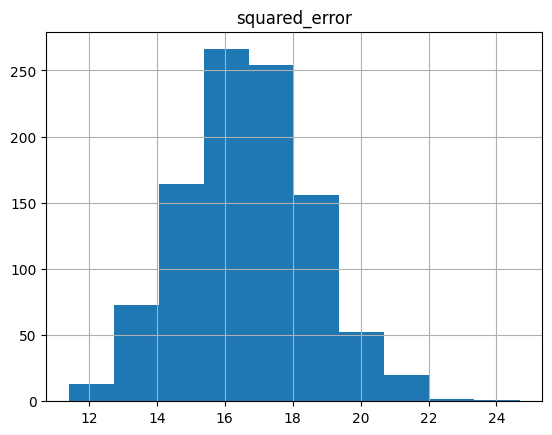

In [13]:
df_simulation.hist()

In [14]:
df_simulation.quantile(0.05)

squared_error    13.595854
Name: 0.05, dtype: float64

In [15]:
df_simulation.quantile(0.95)

squared_error    19.872903
Name: 0.95, dtype: float64

### 4. Next, we will load the hbat data
__Load the hbat data, fit a Linear Regression__ using the same number of variables and rows (in statistical terms it means the same degrees of freedom) and calculate the sum of squared errors (SSE).


In [16]:
hbat = pd.read_spss("datasets/HBAT.sav")

ImportError: Missing optional dependency 'pyreadstat'.  Use pip or conda to install pyreadstat.

In [18]:
hbat

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,1.0,1 to 5 years,Magazine industry,Large (500+),Outside North America,Direct to customer,8.5,3.9,2.5,5.9,...,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,"Yes, would consider"
1,2.0,Over 5 years,Newsprint industry,Small (0 to 499),USA/North America,Indirect through broker,8.2,2.7,5.1,7.2,...,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,"No, would not consider"
2,3.0,Over 5 years,Magazine industry,Large (500+),Outside North America,Direct to customer,9.2,3.4,5.6,5.6,...,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,"Yes, would consider"
3,4.0,Less than 1 year,Newsprint industry,Large (500+),Outside North America,Indirect through broker,6.4,3.3,7.0,3.7,...,7.0,3.6,4.3,4.1,3.0,4.8,6.0,7.2,40.1,"No, would not consider"
4,5.0,1 to 5 years,Magazine industry,Large (500+),USA/North America,Direct to customer,9.0,3.4,5.2,4.6,...,6.1,4.5,4.5,3.5,3.5,7.1,6.6,9.0,57.1,"No, would not consider"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,Less than 1 year,Newsprint industry,Small (0 to 499),USA/North America,Direct to customer,8.6,4.8,5.6,5.3,...,5.8,3.6,4.9,3.6,3.6,7.3,8.1,8.1,50.1,"Yes, would consider"
96,97.0,Less than 1 year,Magazine industry,Small (0 to 499),Outside North America,Direct to customer,7.4,3.4,2.6,5.0,...,4.5,6.4,4.2,5.6,3.7,6.3,5.5,7.2,48.1,"No, would not consider"
97,98.0,Less than 1 year,Magazine industry,Small (0 to 499),USA/North America,Direct to customer,8.7,3.2,3.3,3.2,...,5.0,4.3,3.1,2.9,2.5,5.4,7.0,7.7,51.1,"No, would not consider"
98,99.0,1 to 5 years,Newsprint industry,Small (0 to 499),Outside North America,Direct to customer,7.8,4.9,5.8,5.3,...,6.0,5.7,4.3,4.9,3.9,6.4,7.1,7.4,61.1,"No, would not consider"


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for var in ['x7','x8','x9','x10','x11','x19']:
    hbat[var+"_"] = scaler.fit_transform(hbat[[var]])

In [20]:
hbat[['x7_','x8_','x9_','x10_','x11_','x19_']]

,x7_,x8_,x9_,x10_,x11_,x19_
0,0.485714,0.166667,0.634615,0.630435,0.426230,0.673077
1,0.142857,0.527778,0.884615,0.326087,0.918033,0.192308
2,0.342857,0.597222,0.576923,0.760870,0.836066,0.807692
3,0.314286,0.791667,0.211538,0.608696,0.393443,0.019231
4,0.342857,0.541667,0.384615,0.065217,0.606557,0.461538
...,...,...,...,...,...,...
95,0.742857,0.597222,0.519231,0.086957,0.606557,0.500000
96,0.342857,0.180556,0.461538,0.478261,0.344262,0.307692
97,0.285714,0.277778,0.115385,0.260870,0.622951,0.134615
98,0.771429,0.625000,0.519231,0.717391,0.491803,0.326923


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = hbat[['x7_','x8_','x9_','x10_','x11_']]
y = hbat['x19_']
model.fit(X,y)
yhat = model.predict(X)
hbat['x19_hat'] = yhat


In [22]:
hbat['squared_error'] = (hbat['x19_hat']-hbat['x19_'])**2

In [23]:
hbat[['x19_','x19_hat','squared_error']]

,x19_,x19_hat,squared_error
0,0.673077,0.429323,0.059416
1,0.192308,0.593652,0.161077
2,0.807692,0.570379,0.056318
3,0.019231,0.249846,0.053183
4,0.461538,0.308012,0.023571
...,...,...,...
95,0.500000,0.441467,0.003426
96,0.307692,0.286487,0.000450
97,0.134615,0.238138,0.010717
98,0.326923,0.500147,0.030007


In [24]:
sum(hbat['squared_error'])

2.5452446802832793

### 5. Finally, the p-value
__the p-value is the percentage of the random generated SSE (df_simulation) that are smaller than the one obtained by the hbat Linear Regression__. 

In this case you will see that it is 0%, meaning that our model is better than 100% of the prediction made by a model generated in random sample with the same degree of freedom (same number of variables and same number of data points)

array([[<AxesSubplot:title={'center':'squared_error'}>]], dtype=object)

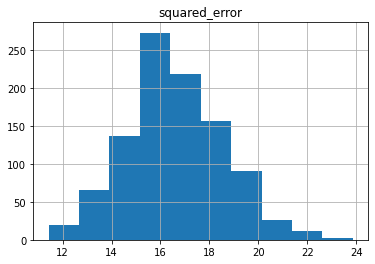

In [25]:
df_simulation.hist()

In [26]:
sum(hbat['squared_error'])

2.5452446802832793

In [27]:
df_simulation['squared_error'] < sum(hbat['squared_error'])

0       False
1       False
2       False
3       False
4       False
        ...  
996     False
997     False
998     False
999     False
1000    False
Name: squared_error, Length: 1001, dtype: bool

In [28]:
sum(df_simulation['squared_error'] < sum(hbat['squared_error']))

0

In [29]:
p_value = sum(df_simulation['squared_error'] < sum(hbat['squared_error']))/len(df_simulation)

In [30]:
p_value

0.0

# To finish this, let's hear a song about p-value - about rare events ;-)

---


Let's here a song about p-value, actually about rare events:

Alanis Morissette - Ironic: https://www.youtube.com/watch?v=Jne9t8sHpUc


<a href="https://www.youtube.com/watch?v=Jne9t8sHpUc" target="_blank"> <img src="img/ironic_alanis_morissette.png"> </a>

